<a href="https://colab.research.google.com/github/sarmi2325/Machine-Learning/blob/main/Normal_distribution_and_std_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

Loading dataset

In [3]:
df = pd.read_csv('height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df_height = df.drop(columns='Weight')
df_height

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


<Axes: xlabel='Height', ylabel='Count'>

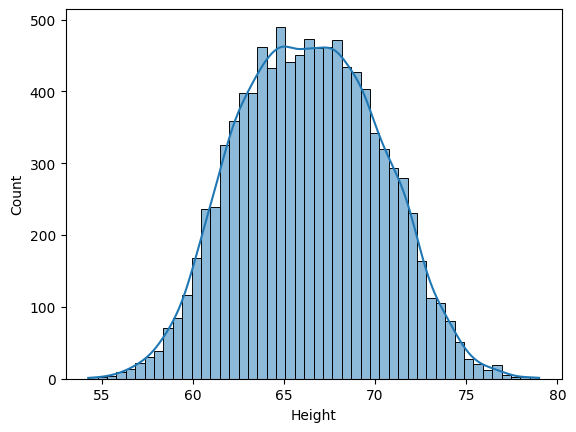

In [21]:
sn.histplot(df_height.Height,kde=True)

In [6]:
df_height.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


To eliminate the outliers


1.   lower = mean - 3*std
2.   upper = mean + 3*std




In [10]:
std_dev = df_height['Height'].std()
std_dev

3.8475281207732293

In [12]:
mean_h = df_height['Height'].mean()
mean_h

66.36755975482124

In [14]:
lower = mean_h - 3*std_dev
upper = mean_h + 3*std_dev
lower,upper

(54.82497539250156, 77.91014411714093)

In [17]:
df[(df_height.Height<lower)|(df_height.Height>upper)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [19]:
no_outliers = df[(df_height.Height>lower)&(df_height.Height<upper)]
no_outliers

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


**Z-score**

Z = (x - mean)/stddev

In [26]:
df_height['Zscore'] = (df_height.Height - df_height.Height.mean())/df_height.Height.std()
df_height

,Gender,Height,Zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [27]:
df[(df_height.Zscore<-3)|(df_height.Zscore>3)]

,Gender,Height,Weight,Zscore
994,Male,78.095867,255.690835,60.846465
1317,Male,78.462053,227.342565,61.212651
2014,Male,78.998742,269.989699,61.749340
3285,Male,78.528210,253.889004,61.278808
3757,Male,78.621374,245.733783,61.371972
6624,Female,54.616858,71.393749,37.367456
9285,Female,54.263133,64.700127,37.013731
